## Ecg Prototype data processing pipeline 

[[-275. -119. -119.]
 [-275. -119. -119.]
 [-275. -118. -121.]
 ...
 [  -4.  -83.   21.]
 [  -9.  -88.   31.]
 [ -16.  -96.   33.]]
(6500, 3)
[[-0.2816   -0.121856 -0.121856]
 [-0.2816   -0.121856 -0.121856]
 [-0.2816   -0.120832 -0.123904]
 ...
 [-0.004096 -0.084992  0.021504]
 [-0.009216 -0.090112  0.031744]
 [-0.016384 -0.098304  0.033792]]


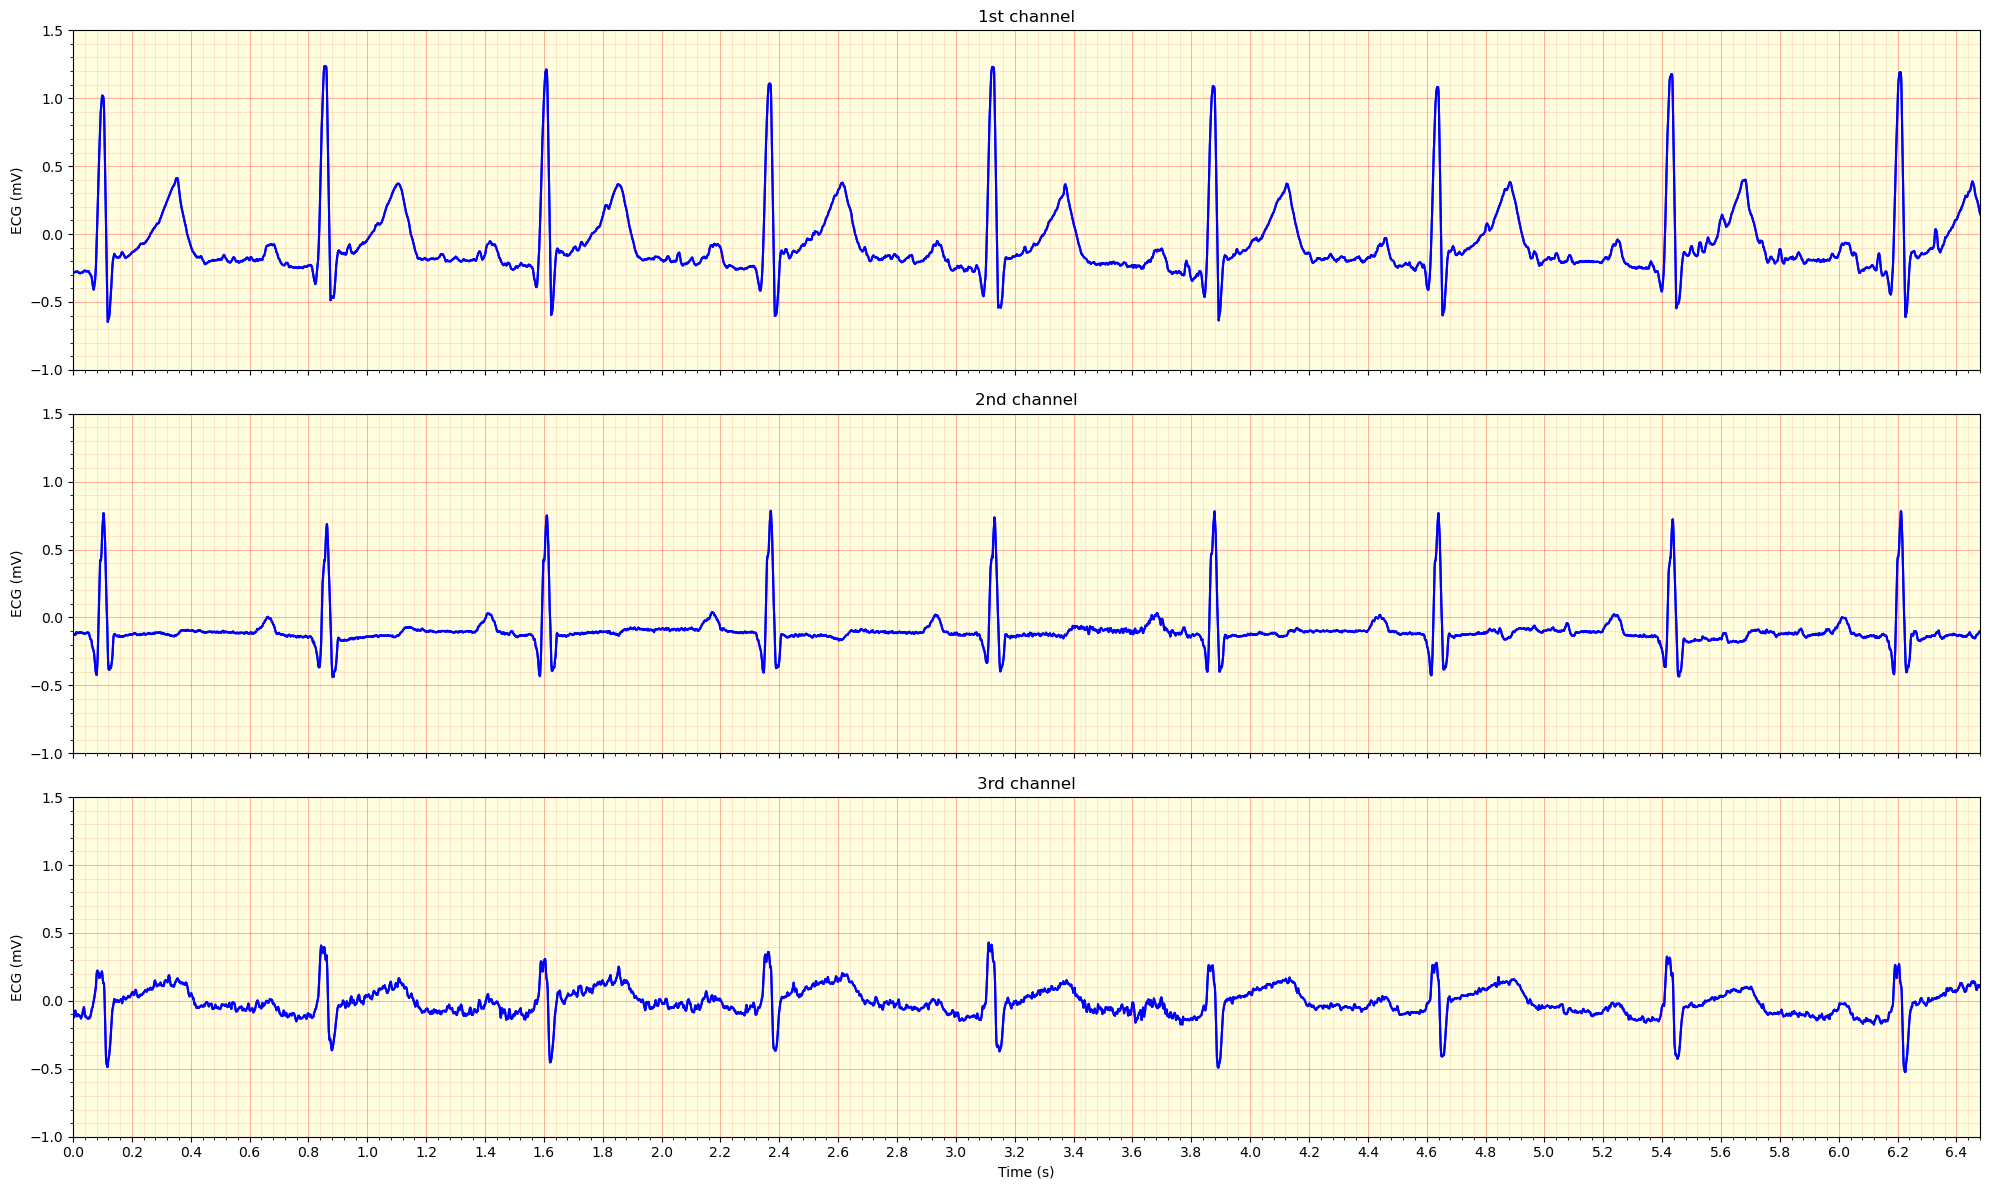

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Load the data
data = np.loadtxt('ECGu.txt')
print(data)
print(data.shape)

# Conversion to mV
ECGmV = data * 0.001024
print(ECGmV)
# Analog_to_digital_conversion_gain = 1024
# microvolt_to_millivolt = 1000
# ECGmV = data * Analog_to_digital_conversion_gain / microvolt_to_millivolt
# print(ECGmV)

fs = 1000  # Sampling frequency in Hz
t = np.arange(len(data)) / fs #create a tab with a step 

# Plot each channel on a separate subplot (channel)
fig, axs = plt.subplots(3, 1, figsize=(20, 12), sharex=True)

colors = ['blue', 'blue', 'blue']
labels = ['1st channel', '2nd channel', '3rd channel']


for i in range(3):
    axs[i].plot(t, ECGmV[:, i], color=colors[i])
    axs[i].set_ylabel("ECG (mV)")
    axs[i].set_title(labels[i])

ymin = np.min(ECGmV) 
ymax = np.max(ECGmV)

for i in range(3):
    axs[i].plot(t, ECGmV[:, i], color=colors[i])
    axs[i].set_ylabel("ECG (mV)")
    axs[i].set_title(labels[i])
    axs[i].set_ylim(ymin, ymax)
    axs[i].set_xlim(0, 5.4)
    axs[i].set_axisbelow(True)
    axs[i].minorticks_on()  
    #Major grid
    axs[i].grid(True, which='major', color='r', linestyle='-', alpha=0.3)
    #Minor grid
    axs[i].grid(True, which='minor', color='r', linestyle='-', alpha=0.1)
    #Graduations/ticks
    axs[i].set_xticks(np.arange(0, 6.5, 0.2))  #1 tick every 0.2sec from 0 to 6.5s
    axs[i].set_xticks(np.arange(0, 6.5, 0.04), minor=True)   #1 tick every 0.04sec from 0 to 6.5s
    axs[i].set_yticks(np.arange(-1, 1.6, 0.5))  #1 tick every 0.5mV between -1 and 1.6
    axs[i].set_yticks(np.arange(-1, 1.6, 0.1), minor=True)  #1 tick every 0.1mV between -1 and 1.6
    # Couleur de fond
    axs[i].set_facecolor('#ffffe0')  #beige background

axs[2].set_xlabel("Time (s)")
plt.tight_layout()
plt.show()